<a href="https://colab.research.google.com/github/ianblakley/i310d-assignment-1/blob/main/codingassignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [ ]:
url = "https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table"
medals_df = pd.read_html(url, match = "Summer Olympic Games")
medals_df[0].head()

Team  \
  .mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Team (IOC code)   
0                                  Afghanistan (AFG)                                       
1                                      Algeria (ALG)                                       
2                                    Argentina (ARG)                                       
3                                      Armenia (ARM)                                       
4                            Australasia (ANZ) [ANZ]                                       

  Summer Olympic Games                                        \
                   No. Unnamed: 2_level_1 Unnamed: 3_level_1   
0                   15                  0                  0   
1                   14                  5                  4   
2                   25                 21                 26   
3                    7                  2                  8   
4                    2                  3                  4   

                                        Winter Olympic Games  \
  Unnamed: 4_level_1 Unnamed: 5_level_1                  No.   
0                  2                  2                    0   
1                  8                 17                    3   
2                 30                 77                   20   
3                  8                 18                    8   
4                  5                 12                    0   

                                                            \
  Unnamed: 7_level_1 Unnamed: 8_level_1 Unnamed: 9_level_1   
0                  0                  0                  0   
1                  0                  0                  0   
2                  0                  0                  0   
3                  0                  0                  0   
4                  0                  0                  0   

                      Combined total                                          \
  Unnamed: 10_level_1            No. Unnamed: 12_level_1 Unnamed: 13_level_1   
0                   0             15                   0                   0   
1                   0             17                   5                   4   
2                   0             45                  21                  26   
3                   0             15                   2                   8   
4                   0              2                   3                   4   

                                           
  Unnamed: 14_level_1 Unnamed: 15_level_1  
0                   2                   2  
1                   8                  17  
2                  30                  77  
3                   8                  18  
4                   5                  12

Here I used pandas read_html tool to read through the data on the Wikipedia url I provided, matching it to the table with the column "Summer Olympic Games." As you can see, the columns are a bit messy, but the data is there.

In [ ]:
medals_df = pd.DataFrame(medals_df[0])

In [ ]:
medals_df = medals_df.rename(columns={'.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Team (IOC code)': 'Team',
                                      'Unnamed: 2_level_1': 'Gold (Summer)', 'Unnamed: 3_level_1': 'Silver (Summer)', 'Unnamed: 4_level_1': 'Bronze (Summer)',
                                      'Unnamed: 5_level_1': 'Total (Summer)'})

medals_df = medals_df.rename(columns={'Unnamed: 7_level_1': 'Gold (Winter)', 'Unnamed: 8_level_1': 'Silver (Winter)', 'Unnamed: 9_level_1': 'Bronze (Winter)',
                                      'Unnamed: 10_level_1': 'Total (Winter)'})

medals_df = medals_df.rename(columns={'Unnamed: 12_level_1': 'Gold', 'Unnamed: 13_level_1': 'Silver', 'Unnamed: 14_level_1': 'Bronze',
                                      'Unnamed: 15_level_1': 'Total'})

In [ ]:
medals_df = medals_df.droplevel(0, axis=1).rename(columns={'No.': 'Number of Olympic Games'})

In [ ]:
medals_df['Team'] = medals_df['Team'].str.split('(').str[0]

In [ ]:
medals_df = medals_df.drop(156)

These code blocks are just cleaning up the dataframe and making it more readable by fixing the column names and such.

In [ ]:
medals_df

,Team,Number of Olympic Games,Gold (Summer),Silver (Summer),Bronze (Summer),Total (Summer),Number of Olympic Games,Gold (Winter),Silver (Winter),Bronze (Winter),Total (Winter),Number of Olympic Games,Gold,Silver,Bronze,Total
0,Afghanistan,15,0,0,2,2,0,0,0,0,0,15,0,0,2,2
1,Algeria,14,5,4,8,17,3,0,0,0,0,17,5,4,8,17
2,Argentina,25,21,26,30,77,20,0,0,0,0,45,21,26,30,77
3,Armenia,7,2,8,8,18,8,0,0,0,0,15,2,8,8,18
4,Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Zambia,14,0,1,1,2,0,0,0,0,0,14,0,1,1,2
152,Zimbabwe,14,3,4,1,8,1,0,0,0,0,15,3,4,1,8
153,Independent Olympic Athletes,3,1,0,1,2,0,0,0,0,0,3,1,0,1,2
154,Independent Olympic Participants,1,0,1,2,3,0,0,0,0,0,1,0,1,2,3


In [ ]:
total_medals = medals_df.iloc[:, [0] + list(range(-5, 0))]
summer_medals = medals_df.iloc[:, :6]
winter_medals = medals_df.iloc[:, [0] + list(range(6, 11))]

Here I'm splitting the main dataframe into three separate dataframes: summer olympic medals, winter olympic medals, and combined medals.

In [ ]:
medals_df.to_csv('medals_df.csv')
summer_medals.to_csv('summer_medals.csv')
winter_medals.to_csv('winter_medals.csv')
total_medals.to_csv('total_medals.csv')

In [ ]:
summer_top_10_gold = summer_medals.sort_values('Gold (Summer)', ascending=False).head(10)
summer_top_10_total = summer_medals.sort_values('Total (Summer)', ascending=False).head(10)

winter_top_10_gold = winter_medals.sort_values('Gold (Winter)', ascending=False).head(10)
winter_top_10_total = winter_medals.sort_values('Total (Winter)', ascending=False).head(10)

total_medals_top_10_gold = total_medals.sort_values('Gold', ascending=False).head(10)
total_medals_top_10_total = total_medals.sort_values('Total', ascending=False).head(10)

Making several sub DataFrames here that I can use to make some plots (top 10 countries by gold medals and total medals)

Text(0, 0.5, 'Gold Medals')

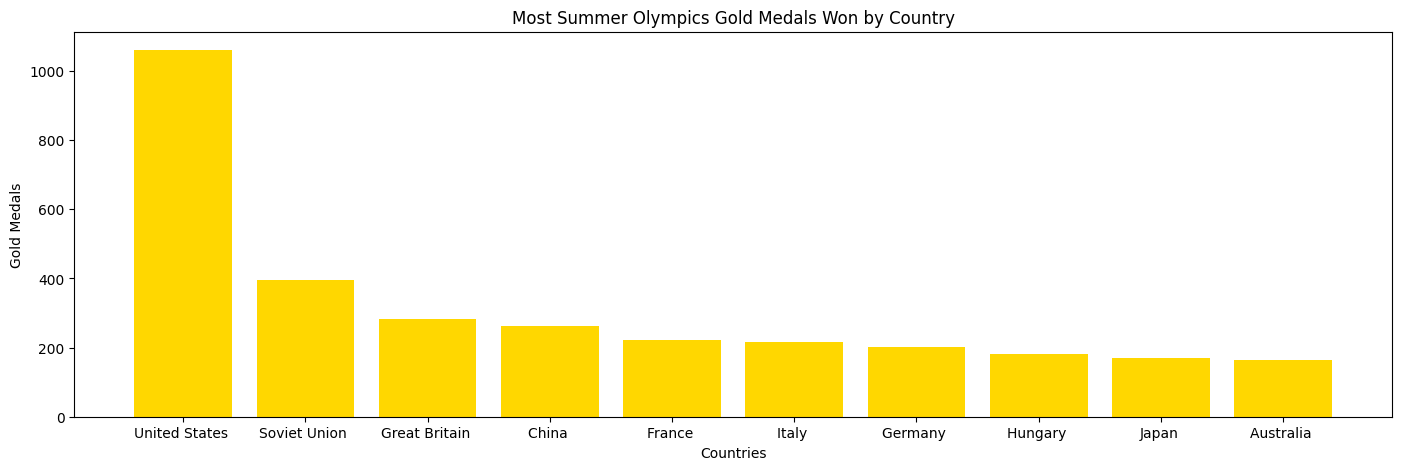

In [ ]:
plt.figure(figsize=(17,5))

plt.bar(summer_top_10_gold['Team'], summer_top_10_gold['Gold (Summer)'], color='gold')

plt.title('Most Summer Olympics Gold Medals Won by Country')
plt.xlabel('Countries')
plt.ylabel('Gold Medals')

Text(0, 0.5, 'Medals')

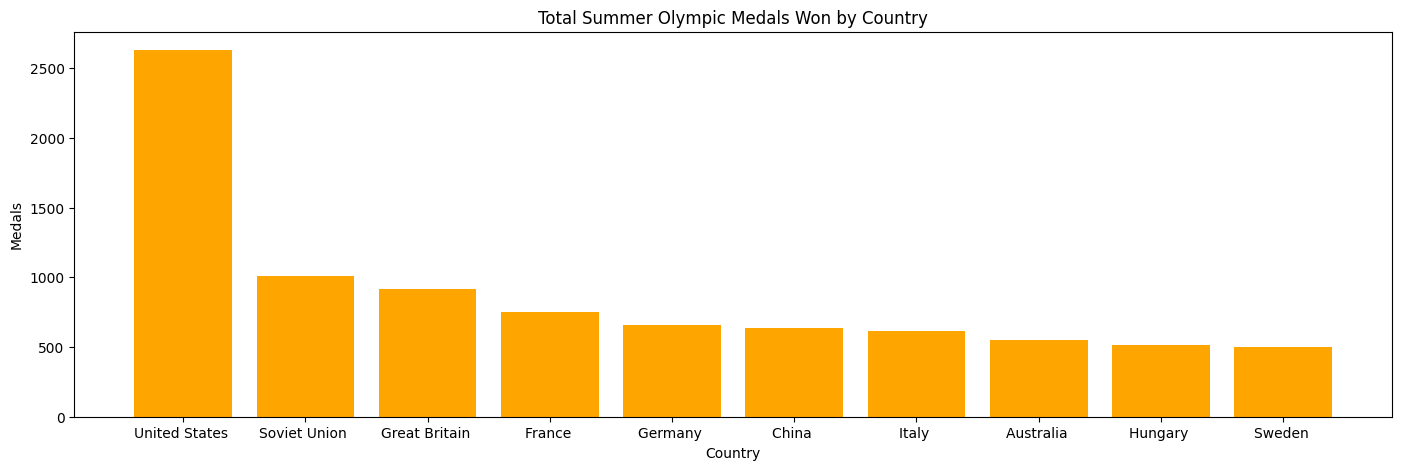

In [ ]:
plt.figure(figsize=(17,5))

plt.bar(summer_top_10_total['Team'], summer_top_10_total['Total (Summer)'], color='orange')

plt.title('Total Summer Olympic Medals Won by Country')
plt.xlabel('Country')
plt.ylabel('Medals')

Text(0, 0.5, 'Gold Medals')

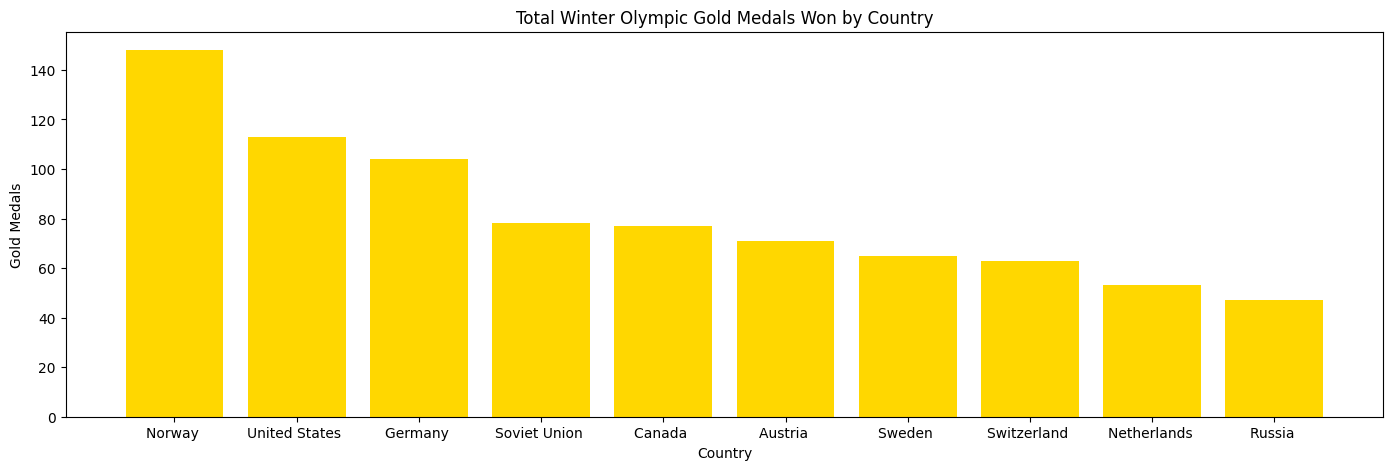

In [ ]:
plt.figure(figsize=(17,5))

plt.bar(winter_top_10_gold['Team'], winter_top_10_gold['Gold (Winter)'], color='gold')

plt.title('Total Winter Olympic Gold Medals Won by Country')
plt.xlabel('Country')
plt.ylabel('Gold Medals')

Text(0, 0.5, 'Medals')

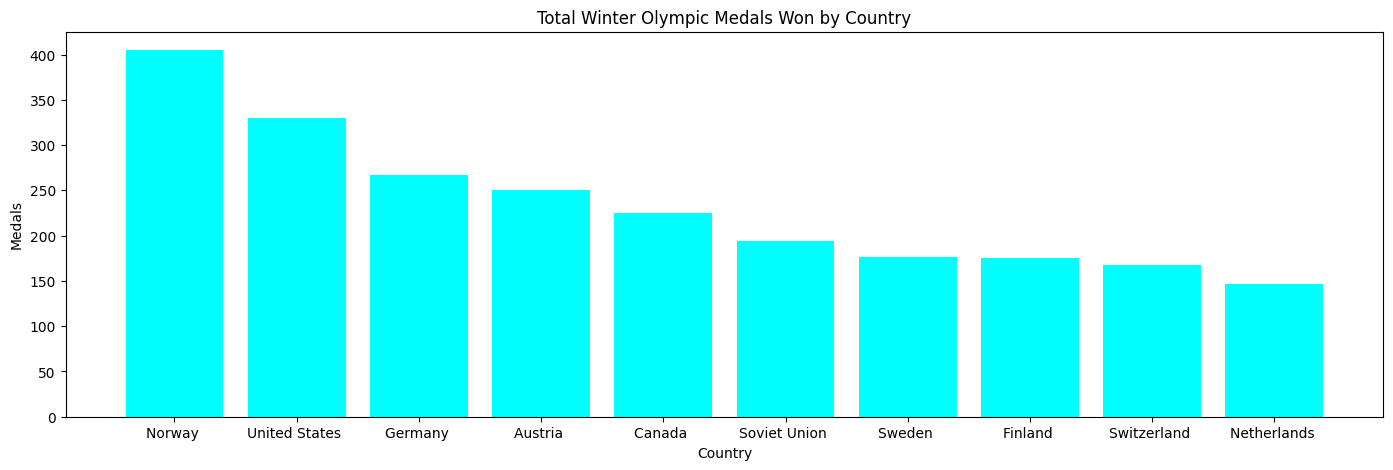

In [ ]:
plt.figure(figsize=(17,5))

plt.bar(winter_top_10_total['Team'], winter_top_10_total['Total (Winter)'], color='cyan')

plt.title('Total Winter Olympic Medals Won by Country')
plt.xlabel('Country')
plt.ylabel('Medals')

Text(0, 0.5, 'Gold Medals')

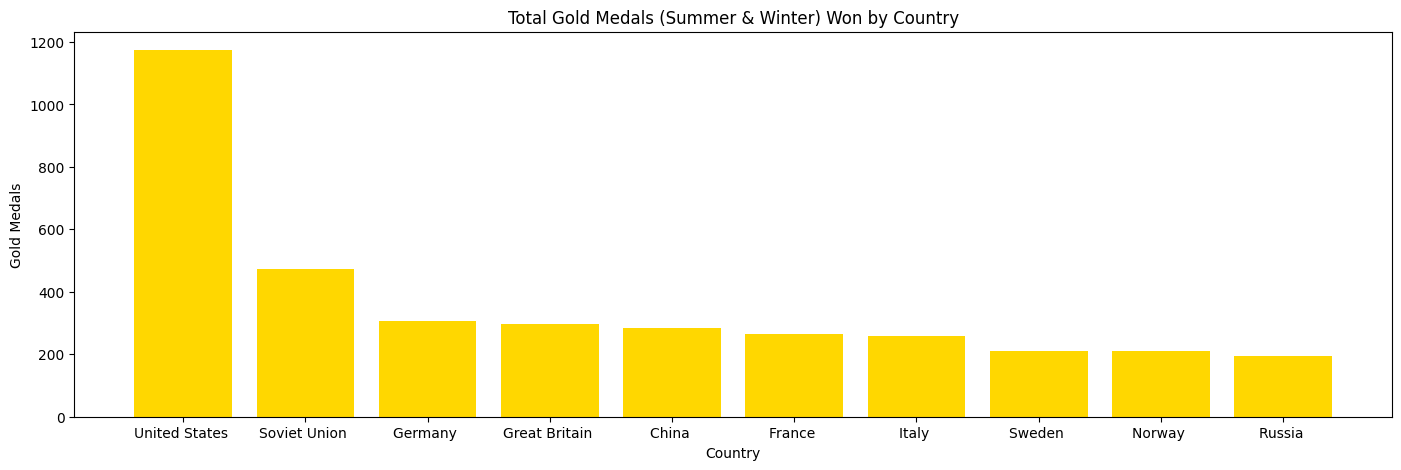

In [ ]:
plt.figure(figsize=(17,5))

plt.bar(total_medals_top_10_gold['Team'], total_medals_top_10_gold['Gold'], color='gold')

plt.title('Total Gold Medals (Summer & Winter) Won by Country')
plt.xlabel('Country')
plt.ylabel('Gold Medals')

Text(0, 0.5, 'Medals')

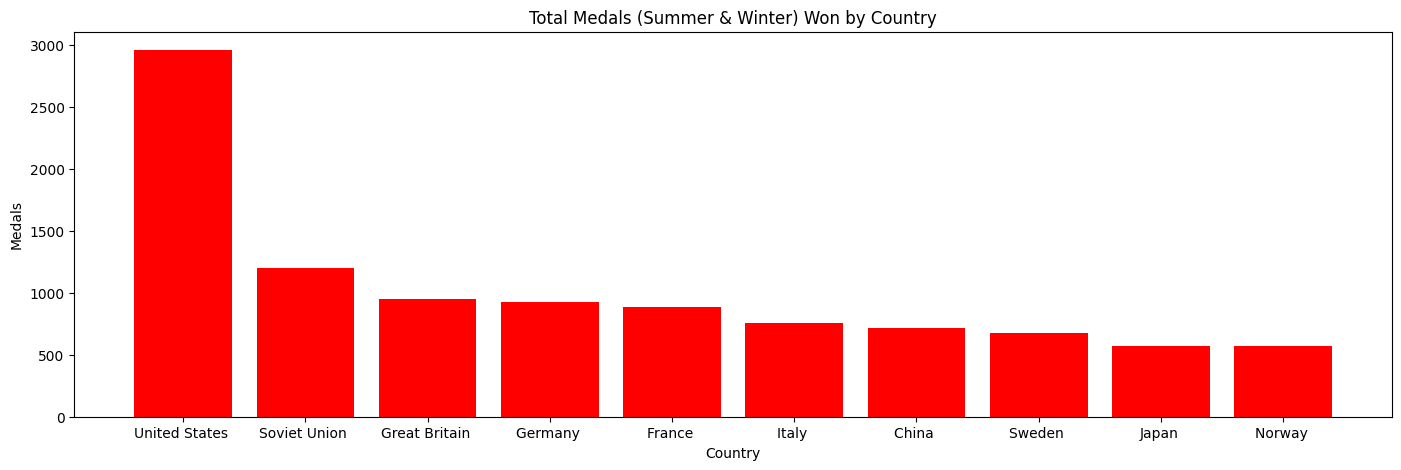

In [ ]:
plt.figure(figsize=(17,5))

plt.bar(total_medals_top_10_total['Team'], total_medals_top_10_total['Total'], color='red')

plt.title('Total Medals (Summer & Winter) Won by Country')
plt.xlabel('Country')
plt.ylabel('Medals')

Finally, these are my graphs. They include total gold medals for the Summer and Winter Olympics, total medals for the Summer and Winter Olympics, and a combined total of both.